# CyPer - Cyclist Performance Prediction Model

## Abstract
Sports are developing towards increasingly scientific training methods with increasing amounts of data being collected from training sessions, bike packing trips, ultra races and competitions. In cycling, it is standard to equip bicycles with small computers recording data from sensors such as power-meters, in addition to heart-rate, speed, altitude etc. Recently, machine learning techniques have provided huge success in a wide variety of areas where large amounts of data (“big data”) is available. In this project, I perform a experiment on machine learning to model power response in cyclists. The project shows that it is possible to train a deep neural network machine learning algorithm to predict the power in Watts (a measure of how much energy you are placing into the pedals) of a cyclist for the next ride.

### Project Organisation

The project is organized as seen below:

- CyPer_presentation.pdf: Presentation of the project including additional explanation about the perfomance prediction for cyclists.
- [CyPer_EDA](CyPer_EDA.ipynb): Loading and pre-processing raw data. Followed by an exploration of the given data as well as the data cleaning process. This document ends with an edited dataframe ready to use for Tableau (for data visualisation).
- [CyPer_Visualization_Tableau](https://public.tableau.com/profile/jo105#!/vizhome/RuffRiderBoard/RuffRiderBoard): Whole data visualisation is done with Tableau including a customized dashboard.
- [CyPer_DP4Model](CyPer_DP4Model.ipynb): Loading and pre-processing raw data.This document ends with an edited dataframe ready to use for modeling / execute machine learning.
- [CyPer_Regression](CyPer_Regression.ipynb): Creation and elaboration of train-test split as well as design of three baseline models: Ridge Regression, Lasso Regression and ElastcNet. 
- [CyPer_TensorFlow](CyPer_TensorFlow.ipynb): Creation and elaboration of train-test split + Implementation and evaluation of a deep neural network (with TensorFlow) for the prediction of the needed / to be applied power in watt.
- [CyPer_Summary](README.md): Treatise of all aspect of the project.

# Feature Explanation

| Variable          | Description                                                                                                                                            |
|-------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| When              | Date (YYYY-MM-DD hh:mm:ss)                                                                                                                             |
| type              | Activity type                                                                                                                                          |
| gear              | Bike Model                                                                                                                                             |
| dist_km           | Distance in km                                                                                                                                         |
| elv_m             | Elevation Gain in m                                                                                                                                    |
| elapsed_time      | Activity time total                                                                                                                                    |
| moving_time       | Activity time in motion                                                                                                                                |
| start_time        | Activity start time                                                                                                                                    |
| day_of_week       | Weekday                                                                                                                                                |
| speed_km/h        | Average Speed in km/h                                                                                                                                  |
| pace_min/km       | Time for one km in min                                                                                                                                 |
| pace_min/100m     | Time for 100m in min                                                                                                                                   |
| max_pace_min/100m | Average Power in Watt                                                                                                                                  |
| power_W           | Average Power in Watt                                                                                                                                  |
| cad               | Average Cadence                                                                                                                                        |
| heart             | Average Heart Rate in bpm (beats per minute)                                                                                                           |
| elv_high_m        | Elevation High in m                                                                                                                                    |
| elv_low_m         | Elevation Low in m                                                                                                                                     |
| efficiency_%      | Efficiency is the moving time divided by the elapsed time as a percentage. 100% means you didn't stop,  the lower the value the more/longer the stops. |
| elv/dist_m/km     | Elevation Gain in m per km                                                                                                                             |
| elv/time_m/h      | Elevation Gain in m per h                                                                                                                              |
| w/hr              | Weighted average power (or just average power if weighted not available) divided by heartrate.                                                         |
| speed/hr          | Average speed by average heart rate                                                                                                                    |
| temp_°C           | Average temperature                                                                                                                                    |
| cal               | Calories - Amount of the energy a cyclist burned during an activity                                                                                    |
| energy_kJ         | Amount of the energy a cyclist burned during an activity in kJ                                                                                         |
| h/r_zone1         | Time in heart rate zone 1                                                                                                                              |
| h/r_zone2         | Time in heart rate zone 2                                                                                                                              |
| h/r_zone3         | Time in heart rate zone 3                                                                                                                              |
| h/r_zone4         | Time in heart rate zone 4                                                                                                                              |
| h/r_zone5         | Time in heart rate zone 5                                                                                                                              |
| city              | Location of the cyclist part one                                                                                                                       |
| state             | Location of the cyclist part two                                                                                                                       |
| device/app        | Device/App used to record the data                                                                                                                     |
| cyclist_id        | Rider Name encrypted as number                                                                                                                         |
| timestamp         | When' transformed to timestamp                                                                                                                         |
| date              | DD.MM.YYYY of activity                                                                                                                                 |
| year              | YYYY of activity                                                                                                                                       |
| month             | MM of activity                                                                                                                                         |
| day               | DD of activity                                                                                                                                         |
| dayofyear         | 1 - 365 Day of year of activity                                                                                                                        |
| hour              | hh activity start                                                                                                                                      |
| minute            | mm activity start                                                                                                                                      |
| second            | ss activity start                                                                                                                                      |

## Environment Set-Up

### Load relevant Python Packages

In [1]:
# Importing the most important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import pyplot

# For data reading and data export
import os, glob
from pathlib import Path
from pandas import read_csv

# For data cleaning
from datetime import datetime

# For data exploration

# For data visualisation - WordCloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
# Setting the random seed for reproducability and several plotting style parameters
%matplotlib inline
plt.style.use('seaborn')
sns.set(style="white", palette="pastel",font_scale=1.5, rc={"lines.linewidth": 2.5,'figure.figsize':(11.7,8.27)})
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
RSEED = 105

## Loading Datasets & First Cleaning

CSV files to dataframe 'df'

In [3]:
# Loop for reading in all 55 .csv, glob makes a list of everythin matching the pattern
# eg all csv files in "path"

path = '/Users/johannes/cyclist_performance_prediction/data'# use your path
globbed_files = glob.glob(path + "/*.csv") #creates a list of all csv files

data = [] # pd.concat takes a list of dataframes as an agrument
for csv in globbed_files:
    frame = pd.read_csv(csv)
    frame['filename'] = os.path.basename(csv)
    data.append(frame)

df = pd.concat(data, ignore_index=True) #dont want pandas to try an align row indexes
df.to_csv("data/df_all.csv")

In [4]:
# Display the first 2 rows of the data set
df.head(2)

,When,Type,Gear,Name,Dist km,Elv m,Elapsed Time,Moving Time,Start Time,Day of Week,Speed km/h,Max Speed km/h,Pace /km,Max Pace /km,Pace /100m,Max Pace /100m,Pwr W,Weighted Avg Pwr W,Max Pwr W,Power Meter,Cad,Heart,Max Heart,Elv High m,Elv Low m,Efficiency %,Elev/Dist m/km,Elev/Time m/h,W/HR,Speed/HR,Temp °C,Cal,Energy kJ,Segs,PRs,Group Size,Kudos,Comments,Photos,Com,Trn,Man,Pri,Visibility,Dist away km,Dist start to end km,Ride/Run Type,400m,1 km,5 km,10 km,15 km,20 km,30 km,50 km,1/2 Mile,1 mile,2 mile,10 mile,Half Marathon,Marathon,Perceived Effort,H/R Zone 1,H/R Zone 2,H/R Zone 3,H/R Zone 4,H/R Zone 5,Power 0W,Power 0-50W,Power 50-100W,Power 100-150W,Power 150-200W,Power 200-250W,Power 250-300W,Power 300-350W,Power 350-400W,Power 400-450W,Power 450W+,Pace Zone 1,Pace Zone 2,Pace Zone 3,Pace Zone 4,Pace Zone 5,Pace Zone 6,Flagged,Description,City,State,Tiles calculated,Device/App,Activity Id,Activity Id.1,filename
0,2021-03-28 14:15:27,Ride,Canyon Ultimate CF SLX,Fahrt am Nachmittag,90796.6,797.0,12497,12014,51327,Sunday,7.5576,16.0,132.3,62.50,13.23,6.250,186.1,207,664.0,1,77.0,130.6,167,202.8,30.2,96.135072,8.78,238.8,1.585,0.2083,9.0,2294.0,2235.3,18,2,1,69,0,0,0,0,0,0,Everyone,-1,8.489616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198,9904,912,0,0,1960,23,170,849,3321,3057,1318,742,307,140,127.0,0,0,0,0,0,0,0,"Überwiegend bewölkt, 12°C, Gefühlt 4°C, Luftfe...",NaN,NaN,0,Garmin Edge 1030,5026851534,5026851534,activities1951.csv
1,2021-03-27 12:32:34,Ride,Canyon Ultimate CF SLX,#Südflügel - #Lockdownduo - Samstagscross,95537.9,769.0,18614,16282,45154,Saturday,5.8677,11.9,170.4,84.03,17.04,8.403,94.1,0,NaN,0,0.0,133.9,175,175.8,2.4,87.471795,8.05,170.0,0.703,0.1578,2.0,2410.0,1531.5,16,14,1,83,4,0,0,0,0,0,Everyone,-1,431.177799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1511,13154,1341,276,0,3029,2613,4393,3313,1186,748,424,249,150,89,88.0,0,0,0,0,0,0,0,Stemweder Berg - Kronensee - Wiehen - Kanal\nC...,NaN,NaN,0,Garmin Edge 1030,5020466545,5020466545,activities1951.csv


In [5]:
# Never a bad idea - Quickly check the number of rows (observations) and columns (features) in the df
df.shape

(416002, 93)

In [6]:
# Let us check some basic information for the columns (for example the data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416002 entries, 0 to 416001
Data columns (total 93 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   When                  416002 non-null  object 
 1   Type                  416002 non-null  object 
 2   Gear                  379181 non-null  object 
 3   Name                  415998 non-null  object 
 4   Dist km               416002 non-null  float64
 5   Elv m                 416002 non-null  float64
 6   Elapsed Time          416002 non-null  int64  
 7   Moving Time           416002 non-null  int64  
 8   Start Time            416002 non-null  int64  
 9   Day of Week           416002 non-null  object 
 10  Speed km/h            416002 non-null  float64
 11  Max Speed km/h        416002 non-null  float64
 12  Pace /km              416002 non-null  float64
 13  Max Pace /km          416002 non-null  float64
 14  Pace /100m            416002 non-null  float64
 15  

In [7]:
# Display the names of all columns
df.columns

Index(['When', 'Type', 'Gear', 'Name', 'Dist km', 'Elv m', 'Elapsed Time',
       'Moving Time', 'Start Time', 'Day of Week', 'Speed km/h',
       'Max Speed km/h', 'Pace /km', 'Max Pace /km', 'Pace /100m',
       'Max Pace /100m', 'Pwr W', 'Weighted Avg Pwr W', 'Max Pwr W',
       'Power Meter', 'Cad', 'Heart', 'Max Heart', 'Elv High m', 'Elv Low m',
       'Efficiency %', 'Elev/Dist m/km', 'Elev/Time m/h', 'W/HR', 'Speed/HR',
       'Temp °C', 'Cal', 'Energy kJ', 'Segs', 'PRs', 'Group Size', 'Kudos',
       'Comments', 'Photos', 'Com', 'Trn', 'Man', 'Pri', 'Visibility',
       'Dist away km', 'Dist start to end km', 'Ride/Run Type', '400m', '1 km',
       '5 km', '10 km', '15 km', '20 km', '30 km', '50 km', '1/2 Mile',
       '1 mile', '2 mile', '10 mile', 'Half Marathon', 'Marathon',
       'Perceived Effort', 'H/R Zone 1', 'H/R Zone 2', 'H/R Zone 3',
       'H/R Zone 4', 'H/R Zone 5', 'Power 0W', 'Power 0-50W', 'Power 50-100W',
       'Power 100-150W', 'Power 150-200W', 'Power 200-

In [8]:
# Check how many unique values in `Type`
df["Type"].nunique()

28

In [9]:
# Check all unique values for `Type`
df["Type"].unique()

array(['Ride', 'VirtualRide', 'Run', 'Swim', 'WeightTraining', 'Workout',
       'Hike', 'Crossfit', 'Walk', 'AlpineSki', 'NordicSki',
       'BackcountrySki', 'Canoeing', 'InlineSkate', 'EBikeRide',
       'Snowshoe', 'Windsurf', 'IceSkate', 'Surfing', 'Sail', 'Yoga',
       'VirtualRun', 'Elliptical', 'Kayaking', 'Rowing', 'WaterSport',
       'Snowboard', 'RollerSki'], dtype=object)

In [10]:
# Check the quantity of rows for each `Type`
df["Type"].value_counts()

Ride              360985
VirtualRide        22749
Run                16416
Walk                9809
Swim                1888
Hike                1531
Workout              899
WeightTraining       717
NordicSki            343
AlpineSki            276
Yoga                 111
EBikeRide             62
Snowboard             53
Kayaking              49
BackcountrySki        27
IceSkate              26
Canoeing              10
Rowing                10
Crossfit               9
Snowshoe               8
WaterSport             6
InlineSkate            5
Surfing                4
Windsurf               3
Sail                   3
RollerSki              1
Elliptical             1
VirtualRun             1
Name: Type, dtype: int64

In [11]:
# Check the quantity of values in each column for each `Type`
df.groupby('Type').count()

,When,Gear,Name,Dist km,Elv m,Elapsed Time,Moving Time,Start Time,Day of Week,Speed km/h,Max Speed km/h,Pace /km,Max Pace /km,Pace /100m,Max Pace /100m,Pwr W,Weighted Avg Pwr W,Max Pwr W,Power Meter,Cad,Heart,Max Heart,Elv High m,Elv Low m,Efficiency %,Elev/Dist m/km,Elev/Time m/h,W/HR,Speed/HR,Temp °C,Cal,Energy kJ,Segs,PRs,Group Size,Kudos,Comments,Photos,Com,Trn,Man,Pri,Visibility,Dist away km,Dist start to end km,Ride/Run Type,400m,1 km,5 km,10 km,15 km,20 km,30 km,50 km,1/2 Mile,1 mile,2 mile,10 mile,Half Marathon,Marathon,Perceived Effort,H/R Zone 1,H/R Zone 2,H/R Zone 3,H/R Zone 4,H/R Zone 5,Power 0W,Power 0-50W,Power 50-100W,Power 100-150W,Power 150-200W,Power 200-250W,Power 250-300W,Power 300-350W,Power 350-400W,Power 400-450W,Power 450W+,Pace Zone 1,Pace Zone 2,Pace Zone 3,Pace Zone 4,Pace Zone 5,Pace Zone 6,Flagged,Description,City,State,Tiles calculated,Device/App,Activity Id,Activity Id.1,filename
Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AlpineSki,276,0,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276,0,276,276,70,276,256,256,276,276,276,276,276,160,276,276,276,276,276,276,276,276,276,276,276,276,257,276,276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276,0,276,276,276,276,276,276,276,24,63,66,276,264,276,276,276
BackcountrySki,27,0,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,0,27,27,17,27,27,27,27,27,27,27,27,16,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,0,27,27,27,27,27,27,27,16,10,10,27,27,27,27,27
Canoeing,10,0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0,10,10,0,10,8,8,10,10,10,10,10,1,10,10,10,10,10,10,10,10,10,10,10,10,9,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10,3,4,4,10,9,10,10,10
Crossfit,9,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1,9,9,2,9,1,1,9,9,9,9,9,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1,9,9,9,9,9,9,9,0,0,0,9,1,9,9,9
EBikeRide,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,6,62,62,61,62,58,58,62,62,62,62,62,61,62,62,62,62,62,62,62,62,62,62,62,62,58,62,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,13,2,2,62,58,62,62,62
Elliptical,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1
Hike,1531,476,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,0,1531,1531,473,1531,1232,1232,1531,1531,1531,1531,1531,512,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1248,1531,1531,0,7,7,7,4,2,2,0,0,7,7,7,2,2,0,59,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,0,1531,1531,1531,1531,1531,1531,1531,200,429,429,1531,1301,1531,1531,1531
IceSkate,26,0,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,0,26,26,3,26,25,25,26,26,26,26,26,6,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,0,26,26,26,26,26,26,26,9,16,16,26,25,26,26,26
InlineSkate,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,5,1,5,4,4,5,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5,0,2,2,5,4,5,5,5


In [12]:
# Creat a dataframe groupd by 'Type'
df_1 = df.groupby('Type')

In [13]:
# Check the quantity of values in each column
df_1.get_group('Ride').count()

When                360985
Type                360985
Gear                344166
Name                360981
Dist km             360985
                     ...  
Tiles calculated    360985
Device/App          315723
Activity Id         360985
Activity Id.1       360985
filename            360985
Length: 93, dtype: int64

In [14]:
# How many rows have not 'Pwr W'
df['Pwr W'][df['Pwr W'] <= 0].count()

61524

In [15]:
# Create a dataframe that only contains 'Type' = Ride
df_ride = df[df.Type == "Ride"]

In [16]:
# Save a csv file that contains all relevant activities ('Type' = Ride)
df_ride.to_csv("data/df_ride.csv", index = False)

----------

## Initial Observations

- The target variable **'Power W'** for this project is missing for a certain amount of abservations
- A lot of differnt activities can be recoreded via STRAVA
- The data is provided in its raw state (i.e. all in metres and seconds) --> Convertion to useful UoM

----------

## Data Cleaning

In [17]:
df = df_ride.copy()

### Delet irrelevant data

In [18]:
#Drop columns that are not relevant for the project
#Description has 186324 (83.1%) missing values
df.drop(['Segs', 'PRs', 'Group Size', 'Kudos', 'Comments', 'Photos', 'Com', 'Trn', 'Man', 'Pri', 'Visibility',
'Dist away km', 'Ride/Run Type', '400m', '1 km', '5 km', '10 km', '15 km', '20 km', '30 km', '50 km',
'1/2 Mile', '1 mile', '2 mile', '10 mile', 'Half Marathon', 'Marathon', 'Perceived Effort', 'Pace Zone 1', 'Pace Zone 2', 'Pace Zone 3',
'Pace Zone 4', 'Pace Zone 5', 'Pace Zone 6', 'Flagged', 'Tiles calculated', 'Activity Id.1', 'Power Meter', 'Description'], axis=1, inplace=True)

### Filename

Due the data scraping a bunch of CSV files were created. The file name of each CSV file refers to a cyclist and for encrypto reasons numbers were used instead of names. Each observation can be linked to cyclist number.

In [19]:
# Display how 'filename' is structured
df['filename'].head()

0    activities1951.csv
1    activities1951.csv
2    activities1951.csv
3    activities1951.csv
4    activities1951.csv
Name: filename, dtype: object

In [20]:
# Delet activities1 out of the string in 'filename'
df['filename'] = df['filename'].str.replace('activities1','')

In [21]:
# Delet 1.csv out of the string in 'filename'
df['filename'] = df['filename'].str.replace('1.csv','')

In [22]:
# Delet 2.csv out of the string in 'filename'
df['filename'] = df['filename'].str.replace('2.csv','')

In [23]:
# Delet 3.csv out of the string in 'filename'
df['filename'] = df['filename'].str.replace('3.csv','')

In [24]:
# Delet 4.csv out of the string in 'filename'
df['filename'] = df['filename'].str.replace('4.csv','')

In [25]:
# Check all unique values for `filename`
df['filename'].unique()

array(['95', '76', '99', '106', '110', '37', '83', '17', '130', '40',
       '56', '126', '01', '21', '60', '00', '41', '16', '61', '36', '111',
       '107', '20', '77', '94', '127', '57', '131', '82', '70', '100',
       '27', '31', '116', '66', '89', '11', '46', '50', '07', '120', '93',
       '85', '121', '06', '51', '47', '10', '67', '88', '84', '117', '26',
       '101', '71', '92', '30', '09', '05', '52', '48', '134', '13', '64',
       '68', '33', '114', '102', '25', '29', '72', '122', '44', '86',
       '87', '118', '91', '90', '28', '24', '119', '115', '32', '69',
       '12', '45', '53', '123', '04', '08', '73', '103', '65', '49',
       '124', '03', '58', '54', '42', '19', '15', '132', '62', '81',
       '112', '35', '39', '23', '108', '74', '97', '78', '128', '104',
       '79', '02', '75', '105', '22', '55', '38', '34', '113', '80', '63',
       '14', '18', '43', '59', '125', '129', '96', '109', '133'],
      dtype=object)

In [26]:
# Check how many unique values in `filename`
df['filename'].nunique()

134

- The dataframe consists of observasetions for 134 different cyclists

In [27]:
# save the cleaned df as .pkl file
path = './data/df_ride.pkl'
df.to_pickle(path)
Path(path).is_file()

True

### When

In [28]:
# To work with the `When` column and the data in it we have to transform the data type 
# We do this with the function: `to_datetype`. By this function we convert the date type into *datetime*.
df.When = pd.to_datetime(df.When)

In [29]:
# To get a full understanding for the period of time of our data we figure out the first and the last date
min = df.When.min()
s_min = min.strftime('%d/%m/%Y / %H:%M:%S')
max = df.When.max()
s_max = max.strftime('%d/%m/%Y / %H:%M:%S')
print("The period of time of the data frame goes from: " + s_min + " to: " + s_max + ".")

The period of time of the data frame goes from: 30/12/1989 / 16:00:00 to: 31/03/2021 / 10:35:49.


- The data recording starts in the end of 1989 --> This needs to be evaluated 

In [30]:
# Count the number of observation 
df['When'].dt.year.value_counts()[1989]

392

- Incorrect data transfer from the recording device to STRAVA results in 1989-XX-XX values
    - This is not a problem for the project because the data except the date is still correct and relevant

In [31]:
# Convert timestamp ('When') to datetime object
# Extract additional features from timestamp column 'When'
df = df.assign(
    timestamp = lambda x: pd.to_datetime(x['When']), 
    date = lambda x: x['When'].dt.date,
    year = lambda x: x['When'].dt.year,
    month = lambda x: x['When'].dt.month,
    day = lambda x: x['When'].dt.day,
    dayofyear = lambda x: x['When'].dt.dayofyear,
    hour = lambda x: x['When'].dt.hour,
    minute = lambda x: x['When'].dt.minute,
    second = lambda x: x['When'].dt.second,
)

### Column labels

In [32]:
# Rename columns in a more pythonic way
df = df.rename(columns={
    'Type': 'type', 
    'Gear': 'gear', 
    'Name': 'name',
    'Dist km': 'dist_km',
    'Elv m': 'elv_m',
    'Elapsed Time': 'elapsed_time',
    'Moving Time': 'moving_time',
    'Start Time': 'start_time',
    'Day of Week': 'day_of_week',
    'Speed km/h': 'speed_km/h',
    'Max Speed km/h': 'max_speed_km/h',
    'Pace /km': 'pace_min/km', 
    'Max Pace /km': 'max_pace_min/km', 
    'Pace /100m': 'pace_min/100m',
    'Max Pace /100m': 'max_pace_min/100m',
    'Pwr W': 'power_W',
    'Weighted Avg Pwr W': 'weighted_avg_power_W',
    'Max Pwr W': 'max_power_W',
    'Cad': 'cad',
    'Heart': 'heart',
    'Max Heart': 'max_heart',
    'Elv High m': 'elv_high_m',
    'Elv Low m': 'elv_low_m',
    'Efficiency %': 'efficiency_%',
    'Elev/Dist m/km': 'elv/dist_m/km',
    'Elev/Time m/h': 'elv/time_m/h',
    'W/HR': 'w/hr',
    'Speed/HR': 'speed/hr',
    'Temp °C': 'temp_°C',
    'Cal': 'cal',
    'Energy kJ': 'energy_kJ',
    'Dist start to end km': 'dist_start_to_end_km',
    'H/R Zone 1': 'h/r_zone1',
    'H/R Zone 2': 'h/r_zone2',
    'H/R Zone 3': 'h/r_zone3',
    'H/R Zone 4': 'h/r_zone4',
    'H/R Zone 5': 'h/r_zone5',
    'Power 0W': 'power_0W',
    'Power 0-50W': 'power_0-50W',
    'Power 50-100W': 'power_50-100W',
    'Power 100-150W': 'power_100-150W',
    'Power 150-200W': 'power_150-200W',
    'Power 200-250W': 'power_200-250W',
    'Power 250-300W': 'power_250-300W',
    'Power 300-350W': 'power_300-350W',
    'Power 350-400W': 'power_350-400W',
    'Power 400-450W': 'power_400-450W',
    'Power 450W+': 'power_450W+',
    'Description': 'description',
    'City': 'city',
    'State': 'state',
    'Device/App': 'device/app',
    'Activity Id': 'activity_id',
    'filename': 'cyclist_id'
    }
)

### Unit of measure convertion

In [33]:
# Changing time from seconds to hours
df['elapsed_time'] = pd.to_datetime(df["elapsed_time"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['moving_time'] = pd.to_datetime(df["moving_time"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['start_time'] = pd.to_datetime(df["start_time"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")

In [34]:
# Convert and transform data
df['pace_min/km'] = df["pace_min/km"].round(0)
df['max_pace_min/km'] = df["max_pace_min/km"].round(0)
df['pace_min/100m'] = df["pace_min/100m"].round(0)
df['max_pace_min/100m'] = df["max_pace_min/100m"].round(0)
df['dist_km'] = (df['dist_km'] / 1000).round(2)
df['speed_km/h'] = (df['speed_km/h'] * 3.6).round(1)
df['max_speed_km/h'] = (df['max_speed_km/h'] * 3.6).round(1)
df['pace_min/km'] = pd.to_datetime(df["pace_min/km"], unit='s', errors = 'coerce').dt.strftime("%M:%S")
df['max_pace_min/km'] = pd.to_datetime(df["max_pace_min/km"], unit='s', errors = 'coerce').dt.strftime("%M:%S")
df['pace_min/100m'] = pd.to_datetime(df["pace_min/100m"], unit='s', errors = 'coerce').dt.strftime("%M:%S")
df['max_pace_min/100m'] = pd.to_datetime(df["max_pace_min/100m"], unit='s', errors = 'coerce').dt.strftime("%M:%S")
df['power_W'] = df['power_W'].round(0)
df['heart'] = df['heart'].round(0)
df['temp_°C'] = df['temp_°C'].round(0)
df['efficiency_%'] = df['efficiency_%'].round(2)
df['dist_start_to_end_km'] = (df['dist_start_to_end_km'] / 1000).round(2)

In [35]:
# Convert all values from secounds to HH:MM:SS
df['h/r_zone1'] = pd.to_datetime(df["h/r_zone1"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['h/r_zone2'] = pd.to_datetime(df["h/r_zone2"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['h/r_zone3'] = pd.to_datetime(df["h/r_zone3"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['h/r_zone4'] = pd.to_datetime(df["h/r_zone4"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['h/r_zone5'] = pd.to_datetime(df["h/r_zone5"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['power_0W'] = pd.to_datetime(df["power_0W"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['power_0-50W'] = pd.to_datetime(df["power_0-50W"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['power_50-100W'] = pd.to_datetime(df["power_50-100W"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['power_100-150W'] = pd.to_datetime(df["power_100-150W"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['power_150-200W'] = pd.to_datetime(df["power_150-200W"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['power_200-250W'] = pd.to_datetime(df["power_200-250W"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['power_250-300W'] = pd.to_datetime(df["power_250-300W"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['power_300-350W'] = pd.to_datetime(df["power_300-350W"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['power_350-400W'] = pd.to_datetime(df["power_350-400W"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['power_400-450W'] = pd.to_datetime(df["power_400-450W"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")
df['power_450W+'] = pd.to_datetime(df["power_450W+"], unit='s', errors = 'coerce').dt.strftime("%H:%M:%S")

In [36]:
# Drop duplicates - Each 'activity_id' should be unique
df.drop_duplicates(subset="activity_id", inplace=True)

### Execute Pandas Profiling

In [37]:
# Save a csv file to perform pandas profiling
df.to_csv("data/pandas_profil.csv", index = False)

In [38]:
#Drop columns with to many missing values
#max_power_W has 194319 (69.6%) missing values
#weighted_avg_power_W has 193704 (69.4%) zeros
df.drop(['max_power_W', 'weighted_avg_power_W', 'name', 'dist_start_to_end_km', 'w/hr'], axis=1, inplace=True)

- max_power_W has 194319 (69.6%) missing values
- weighted_avg_power_W has 193704 (69.4%) zeros
- dist_start_to_end_km is not relevant for the project

### dist_km

In [39]:
# Longest distance / biggest 'dist_km' for one activity
df.iloc[df.dist_km.values.argmax()].dist_km

3192.1

In [40]:
# Get the index row for 'dist_km' = 3192.1
df.index[df['dist_km'] == 3192.1]

Int64Index([70025], dtype='int64')

In [41]:
# Checking the row in detail
df.loc[[70025]]

,When,type,gear,dist_km,elv_m,elapsed_time,moving_time,start_time,day_of_week,speed_km/h,max_speed_km/h,pace_min/km,max_pace_min/km,pace_min/100m,max_pace_min/100m,power_W,cad,heart,max_heart,elv_high_m,elv_low_m,efficiency_%,elv/dist_m/km,elv/time_m/h,speed/hr,temp_°C,cal,energy_kJ,h/r_zone1,h/r_zone2,h/r_zone3,h/r_zone4,h/r_zone5,power_0W,power_0-50W,power_50-100W,power_100-150W,power_150-200W,power_200-250W,power_250-300W,power_300-350W,power_350-400W,power_400-450W,power_450W+,city,state,device/app,activity_id,cyclist_id,timestamp,date,year,month,day,dayofyear,hour,minute,second
70025,2020-08-20 05:25:03,Ride,8.2,3192.1,18475.9,00:28:36,18:32:24,05:25:03,Thursday,23.0,73.4,02:36,00:49,00:16,00:05,94.0,73.1,116.0,181,1034.9,83.1,52.38,5.79,133.4,0.1995,19.0,51840.0,47134.7,21:11:33,17:09:16,03:51:55,00:19:31,00:00:09,17:52:07,21:52:10,19:35:57,07:47:40,13:56:35,04:56:57,01:54:35,00:52:54,00:30:13,00:18:20,00:54:56,NaN,NaN,Garmin Edge 1030,3989557638,127,2020-08-20 05:25:03,2020-08-20,2020,8,20,233,5,25,3


- Observation can be verified because it was a multiple cycle trip 

In [42]:
# dist_km has 2902 (1.0%) zeros
# drop all rows with a 'dist_km' of 0
df = df[df.dist_km != 0]

In [43]:
# delate all activities with dist_km < 2km
df = df.drop(df[(df['dist_km'] <= 1.99)].index)

### speed_km/h

In [44]:
# 'speed_km/h' has 2937 (1.1%) zeros
# drop all rows with a 'speed_km/h' of 0
df = df[df['speed_km/h'] != 0]

In [45]:
# checking the max values for 'speed_km/h'
df.iloc[df['speed_km/h'].values.argmax()]['speed_km/h']

575888.4

In [46]:
# delate all activities with an average speed > 70km/h
df = df[df['speed_km/h'] <= 70]

### elv_m

In [47]:
# elv_m has 22149 (7.4%) zeros 
df['elv_m'].loc[df['elv_m'] == 0].count()

16237

- Proporly the most of those 20658 activities are 'Indoorcycling' classified as 'ride' before STRAVA launched the activity type 'VirtualRide' in January 2018
    - Those observations are not relevant for this project

In [48]:
# delet all rows that have 'elv_m' is 0 and the activitie is before 01.02.2018
df = df.drop(df[(df['elv_m'] == 0) & (df['When'] <= '2018-02-01')].index)

### max_speed_km/h

In [49]:
# max_speed_km/h has 10246 (3.7%) zeros 
df['max_speed_km/h'].loc[df['max_speed_km/h'] == 0].count()

2154

In [50]:
# set for 2478 values 'max_speed_km/h' = 0 equals to 'speed_km/h'
df['max_speed_km/h'] = np.where(df['max_speed_km/h'] == 0, df['speed_km/h'], df['max_speed_km/h'])

### power_W

In [51]:
# power_W has 11501 (4.4%) zeros
df['power_W'].loc[df['power_W'] == 0].count()

11417

In [52]:
# replace all 0 in'power_W' with median of 'power_W'
df['power_W'] = df['power_W'].mask(df['power_W'] == 0, df['power_W'].median(skipna=True))

### temp_°C

In [53]:
# temp_°C has 4671 (1.7%) zeros --> this is ok
# temp_°C has 88910 (31.8%) missing values 
df['temp_°C'].isna().sum()

75185

In [54]:
# counting the amount of activities with a 'temp_°C' greater 70°C
len(df[df['temp_°C'] > 70])

80

In [55]:
# delate all 'temp_°C' with an temp greater then 70°C
df = df[df['temp_°C'] <= 70]

In [56]:
# replace all NaN in'temp_°C' with median of 'temp_°C'
df['temp_°C'] = df['temp_°C'].fillna((df['temp_°C'].median()))

### heart

In [57]:
# heart has 119955 (43.0%) missing values 
df['heart'].isna().sum()

59610

In [58]:
# exclude all observations with missing values for 'heart'
df = df[df['heart'].notna()]

In [59]:
# replace all tero with median
df['heart'] = df['heart'].mask(df['heart'] == 0, df['heart'].median(skipna=True))

### energy_kJ

In [60]:
# energy_kJ has 2993 (2.4%) zeros
# replace all 0 in'energy_kJ' with mean of 'energy_kJ'
df['energy_kJ'] = df['energy_kJ'].mask(df['energy_kJ'] == 0, df['energy_kJ'].mean(skipna=True))

### cal

In [61]:
# replace all 0 in'cal' with mean of 'cal'
df['cal'] = df['cal'].mask(df['cal'] == 0, df['cal'].mean(skipna=True))

### cad

In [62]:
# replace all 0 in'cad' with median of 'cad'
df['cad'] = df['cad'].mask(df['cad'] == 0, df['cad'].median(skipna=True))

### elv_high_m / elv_low_m

In [63]:
# replace all NaN in'elv_high_m' with mean of 'elv_high_m'
df['elv_high_m'] = df['elv_high_m'].fillna((df['elv_high_m'].mean()))

In [64]:
# replace all NaN in'elv_low_m' with mean of 'elv_low_m'
df['elv_low_m'] = df['elv_low_m'].fillna((df['elv_low_m'].mean()))

### power_... / h/r_zone...

In [65]:
# replace all NaN in'power_450W+' with 00:00:00
df['power_450W+'] = df['power_450W+'].replace(np.nan, '00:00:00')

In [66]:
df['power_150-200W'].loc[df['power_150-200W'] == '00:00:00'].count()

13659

___________

## Correlation of features with power_W

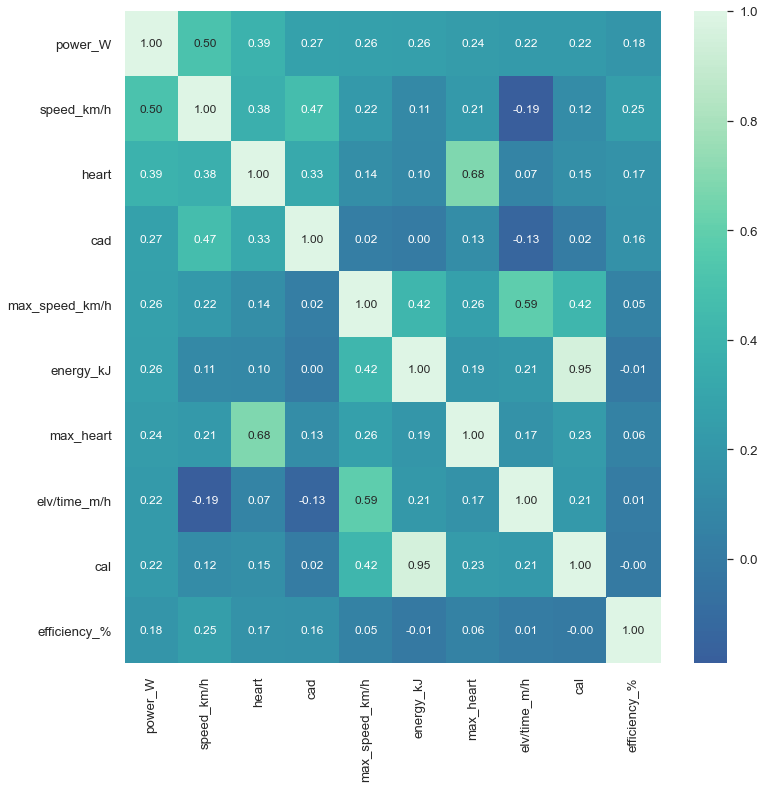

In [67]:
k = 10 #number of variables for heatmap
cols_corr_mat = np.abs(df.corr()).nlargest(k, 'power_W')['power_W'].index
cm = np.corrcoef(df[cols_corr_mat].dropna().values.T)
sns.set(font_scale=1.2)
plt.subplots(figsize=(12,12))
hm = sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size': 12},
                 yticklabels=cols_corr_mat.values, xticklabels=cols_corr_mat.values, cmap='mako', center=0.0)
plt.show()

-----

## WordCloud for most used Gear and Device/App

In [68]:
df_wc = pd.read_csv('data/pandas_profil.csv')

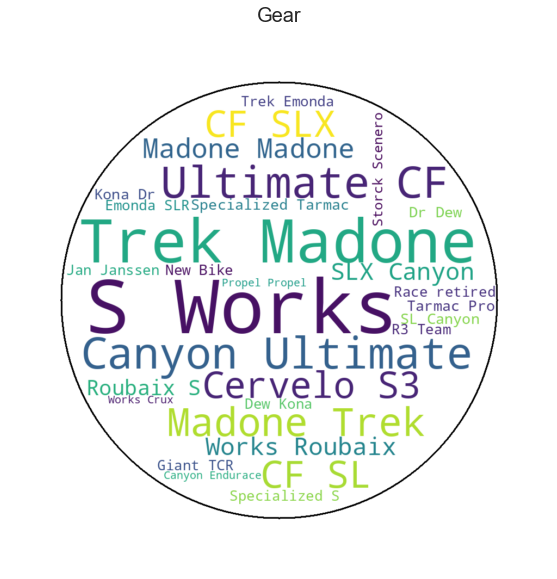

In [69]:
# Creat a mask for word cloud
x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

# Create a word cloud image

text = " ".join(review for review in df['gear'].astype(str))

stopwords = set(STOPWORDS)
stopwords.update(['NaN', 'Name', 'dtype', 'Length', 'object', 'gear'])

wc = WordCloud(background_color="white", max_words=30, mask=mask,
               stopwords=stopwords, contour_width=2, contour_color='black')

# Generate a wordcloud

wc.generate(text)

# store to file

#wc.to_file("Graphics/bike_wc.jpg")

# show

plt.figure(figsize=[20,10])
plt.title("Gear", fontsize=20)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 799.5, 399.5, -0.5)

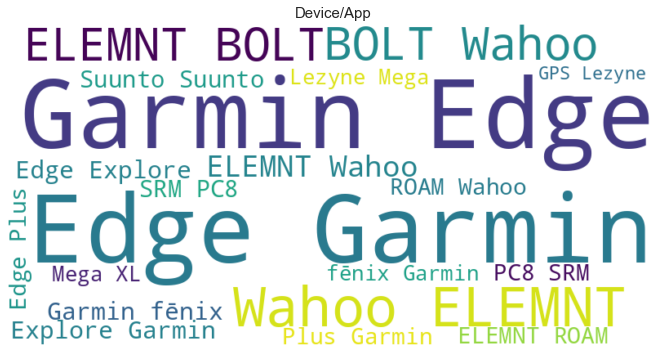

In [70]:
# Wordcloud for device/app

text = " ".join(review for review in df['device/app'].astype(str))

stopwords = set(STOPWORDS)
stopwords.update(['NaN', 'Name', 'dtype', 'Length', 'object', 'device/app'])

wordcloud = WordCloud(background_color="white", max_words=20, width=800, height=400, stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Device/App", fontsize=15)
plt.axis("off")

--------

## Visualisation & Data Exploration

<img src="Graphics/20210420_dashboard.png">

The whole visualisation (including a customizable dashboard) for CyPer is avaiable under: [CyPer](https://public.tableau.com/profile/jo105#!/vizhome/RuffRiderBoard/RuffRiderBoard)

___________

## Export of Data

The Exploratory Data Analysis ends at this point. The DataFrame (df) is organized and cleaned. For purity and performance reasons, the data visualisation part of this project will be continued in Tableau. The interface between the Jupyter Notebook and Tableau will be given using a `.csv`file.
- `df_tableau.csv` --> DataFrame with only the most important features ready for visualisation

In [71]:
# exclute all rows without input for power_... and h/r_zone...    
df = df[df[['h/r_zone1', 'h/r_zone2', 'h/r_zone3', 'h/r_zone4', 'h/r_zone5',
       'power_0W', 'power_0-50W', 'power_50-100W', 'power_100-150W',
       'power_150-200W', 'power_200-250W', 'power_250-300W', 'power_300-350W',
       'power_350-400W', 'power_400-450W', 'power_450W+']].ne('00:00:00', axis=0).any(axis=1)]

In [72]:
df_tableau = df.copy()

In [73]:
df_tableau.to_csv("data/df_tableau.csv", index = False)

In [74]:
# save the cleaned df as .pkl file
path = './data/df_tableau.pkl'
df_tableau.to_pickle(path)
Path(path).is_file()

print('This cell was last run on: ')
print(datetime.now())

This cell was last run on: 
2021-04-25 15:01:06.076505
